In [1]:
%matplotlib notebook

In [2]:
STEP = 50
AREAS = range(50, 300, STEP)  # 50, 100, 150, 200, 250
PREDICT_TO = 500

In [3]:
import random
import math

import ipywidgets as widgets


def prepare_inputs(areas):
    input_widgets = []
    prev_area = 0
    for area in areas:
        w = widgets.BoundedIntText(
            value=random.randint(1, 10) * area,
            min=0,
            max=2**10000,
            description=f'{prev_area}-{area} m^2:',
        )
        display(w)
        input_widgets.append(w)
        prev_area = area
    
    return input_widgets

        
def prepare_button():
    b = widgets.Button(
        description='Calculate',
        button_style='success',
        tooltip='Click to calculate prices',
    )
    display(b)
    
    return b



BoundedIntText(value=200, description='0-50 m^2:', max=1995063116880758384883742162683585083823496831886192454…

BoundedIntText(value=600, description='50-100 m^2:', max=19950631168807583848837421626835850838234968318861924…

BoundedIntText(value=1500, description='100-150 m^2:', max=199506311688075838488374216268358508382349683188619…

BoundedIntText(value=1800, description='150-200 m^2:', max=199506311688075838488374216268358508382349683188619…

BoundedIntText(value=1500, description='200-250 m^2:', max=199506311688075838488374216268358508382349683188619…

Button(button_style='success', description='Calculate', style=ButtonStyle(), tooltip='Click to calculate price…

<IPython.core.display.Javascript object>


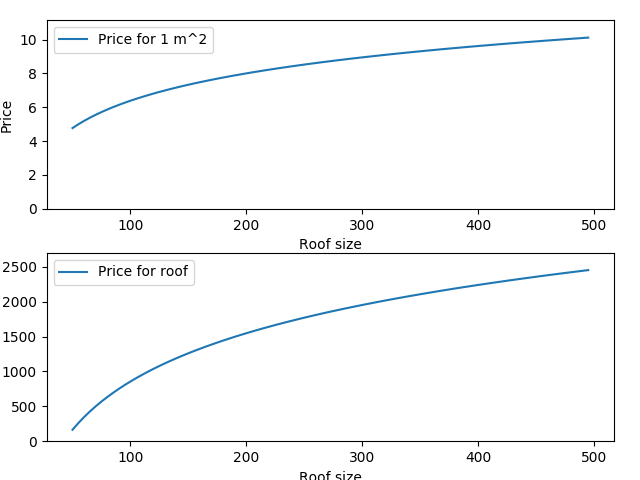

In [4]:
import matplotlib.pyplot as plt
from scipy import interpolate, optimize
import numpy as np


areas = list(AREAS)

inputs = prepare_inputs(AREAS)
submit_b = prepare_button()


def get_m2_values():
    y = [i.value / areas[n] for n, i in enumerate(inputs)]

    func = lambda t, a, b: a + b * np.log(t)
    popt, pcov = optimize.curve_fit(func,  areas,  y, p0=(4, 0.1))
    
    x = range(areas[0], PREDICT_TO, STEP//10)
    
    return x, func(x, *popt)


def get_roof_values():
    y = [i.value for i in inputs]

    func = lambda t, a, b: a + b * np.log(t)
    popt, pcov = optimize.curve_fit(func,  areas,  y, p0=(4, 0.1))
    
    x = range(areas[0], PREDICT_TO, STEP//10)
    
    return x, func(x, *popt)


def prepare_plots():
    fig, axes = plt.subplots(2, 1, squeeze=False)

    ax1 = axes[0][0]
    ax2 = axes[1][0]

    fig.tight_layout()
    
    x, y = get_m2_values()
    ax1.plot(x, y, label='Price for 1 m^2')
    
    x, y = get_roof_values()
    ax2.plot(x, y, label='Price for roof')

    for ax in (ax1, ax2):
        ax.set_xlabel('Roof size')
        ax.set_ylabel('Price')

        ax.legend()
        
    return ax1, ax2


plots = prepare_plots()


def redraw_plots(button):
    data_getters = [get_m2_values, get_roof_values]
    for plot, get_data in zip(plots, data_getters):
        x, y = get_data()
        
        plot.lines[0].set_ydata(y)
        plot.set_ylim(0, max(y) * 1.1)

redraw_plots(None)

submit_b.on_click(redraw_plots)